<a href="https://colab.research.google.com/github/papagorgio23/Python101/blob/master/EDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Do not show warnings
import warnings
warnings.filterwarnings("ignore")

# Read the csv file
file_name = 'SourceFiles\\accepted_2007_to_2018Q3.csv'
df=pd.read_csv(file_name,low_memory=False)

In [ ]:
# Print dimensions of df
df.shape

(2132287, 151)

In [ ]:
# Value count the response variable loan_status.
df.loan_status.value_counts()

Fully Paid                                             1011841
Current                                                 822105
Charged Off                                             254777
Late (31-120 days)                                       22852
In Grace Period                                          12458
Late (16-30 days)                                         5442
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     32
Name: loan_status, dtype: int64

In [ ]:
#Keep only fully paid and charged off because the rest of them cannot be used to make predictions on the probability of
# a loan to be charged off
df = df.loc[(df.loan_status=='Fully Paid') | (df.loan_status=='Charged Off')]

# Print the ratio of fully paid and charged off to all samples in df
df.loan_status.value_counts(normalize=True)

Fully Paid     0.798853
Charged Off    0.201147
Name: loan_status, dtype: float64

In [ ]:
# Replace loan_status column with charged_off column which has 0 and 1 values
df.loc[:,'loan_status']=df.loc[:,'loan_status'].map({'Fully Paid':0,'Charged Off':1})

# Rename 'loan_status' to 'charged_off'
df.rename(columns={'loan_status':'charged_off'},inplace=True)

In [ ]:
# Print dimensions of df after removing the useless samples.
df.shape

(1266618, 151)

### About 80% of the loans in the dataframe are fully paid. Charged off loans form about 20% of the loans.

In [ ]:
# Reset index of the dataframe
df.reset_index(drop=True,inplace=True)

In [ ]:
# id is unique in each row. Check if there is any duplicate rows by checking if there is any duplicate ids
df.id.value_counts().head(3)

23142929    1
443834      1
11926428    1
Name: id, dtype: int64

In [ ]:
# Value count url
df.url.value_counts().head(3)

https://lendingclub.com/browse/loanDetail.action?loan_id=750889      1
https://lendingclub.com/browse/loanDetail.action?loan_id=99951994    1
https://lendingclub.com/browse/loanDetail.action?loan_id=71735115    1
Name: url, dtype: int64

In [ ]:
# Remove id and url from df since they have unique value for each sample
df.drop(['id','url'],axis=1,inplace=True)

#### Features such as collection recovery fee, last payment amount, and features related to hardship and settlement which change or may change during the loan repayment period are removed because they cannot help Lending Club make predictions on the ability of the applicant to pay back the loan at the time the application is received. Therefore, only features such as zip code which are available to Lending Club at the time of processing an application are kept. Interest rate is also kept because it remains fixed during the loan payment, although it is only available once the application is approved.

#### There are many features in the DataFrame such as number of installment accounts opened in past 12 months which are not clear if they are referring to the time the table was created or the time the application was approved. The latter scenario is assumed and these features are kept.

In [ ]:
# Accoridng to my understanding of features and based on the reasoning above, the following list of features is removed 
removal_list = ['collection_recovery_fee','last_credit_pull_d','last_fico_range_high','last_fico_range_low','last_pymnt_amnt',
               'last_pymnt_d','next_pymnt_d','out_prncp','out_prncp_inv','recoveries','total_pymnt','total_pymnt_inv',
                'total_rec_int','total_rec_late_fee','total_rec_prncp','hardship_flag','hardship_type','hardship_reason',
                'hardship_status','deferral_term','hardship_amount','hardship_start_date','hardship_end_date',
                'payment_plan_start_date','hardship_length','hardship_dpd','hardship_loan_status',
                'orig_projected_additional_accrued_interest','hardship_payoff_balance_amount','hardship_last_payment_amount',
                'debt_settlement_flag','debt_settlement_flag_date','settlement_status','settlement_date','settlement_amount',
                'settlement_percentage','settlement_term']

# Remove features in removal_list from the dataframe
df.drop(removal_list,axis=1,inplace=True)

In [ ]:
len(removal_list)

37

In [ ]:
# Print number of remaining columns
len(df.columns)

112

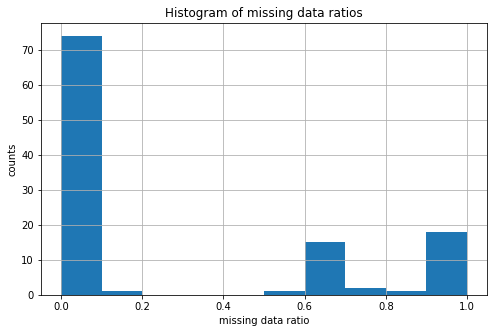

In [ ]:
# Find out the ratio of null values in each column and plot the histogram of the ratios across all columns
plt.figure(figsize=(8,5))
mean_series = df.isnull().mean()
mean_series.plot.hist(grid=True)
plt.title('Histogram of missing data ratios')
plt.xlabel('missing data ratio')
plt.ylabel('counts')
plt.show()

In [ ]:
# There are two groups of missing data ratios, below 20% and beyond 50%. Print the second category
np.round(mean_series[mean_series>=0.2].sort_values(),3)

mths_since_last_delinq                 0.505
max_bal_bc                             0.632
inq_fi                                 0.632
open_rv_24m                            0.632
open_rv_12m                            0.632
total_bal_il                           0.632
open_act_il                            0.632
open_il_12m                            0.632
open_il_24m                            0.632
inq_last_12m                           0.632
total_cu_tl                            0.632
open_acc_6m                            0.632
all_util                               0.632
mths_since_rcnt_il                     0.642
mths_since_recent_revol_delinq         0.666
il_util                                0.681
mths_since_last_major_derog            0.738
mths_since_recent_bc_dlq               0.763
mths_since_last_record                 0.830
desc                                   0.903
annual_inc_joint                       0.983
dti_joint                              0.983
verificati

#### 'desc' is loan description provided by the borrower and null element means no description was provided. Since 90% is missing it is better to remove it
#### 'member_id' is missing across all samples and must be removed

In [ ]:
df.drop(['desc','member_id'],axis=1,inplace=True)

#### The remaining features with high missing ratio can be divided into two groups: Features specific to primary and secondary applicants.

In [ ]:
# Check the ratio of individual and joint applications.
df.application_type.value_counts(normalize=True)

Individual    0.983418
Joint App     0.016582
Name: application_type, dtype: float64

#### Features specific to the secondary applicant have null values across individual applications because only joint applications have a secondary applicant. Since less than 2% of the loans are joint, these features are also removed to reduce the complexity of the model building process.

In [ ]:
# Create a list of features specific to the secondary applicant
joint_list = ['annual_inc_joint','dti_joint','verification_status_joint','revol_bal_joint','sec_app_fico_range_low',
              'sec_app_fico_range_high','sec_app_earliest_cr_line','sec_app_inq_last_6mths','sec_app_mort_acc',
              'sec_app_open_acc','sec_app_revol_util','sec_app_open_act_il','sec_app_num_rev_accts',
              'sec_app_chargeoff_within_12_mths','sec_app_collections_12_mths_ex_med','sec_app_mths_since_last_major_derog']

# Remove features in joint_list from df
df.drop(joint_list,axis=1,inplace=True)

#### Regarding the features which are specific to primary applicant, an expert from Lending Club could tell if a null element means 0 or the data is actually missing. Since there is no access to an expert, if 0 values already exist in these features, equivalency of null value and 0 cannot be assumed.

In [ ]:
# Create the list of features with high ratio of null values which are specific to the primary applicant
list_non_joint = ['mths_since_last_delinq','max_bal_bc','inq_fi','open_rv_24m','open_rv_12m','total_bal_il','open_act_il',
                  'open_il_12m','open_il_24m','inq_last_12m','total_cu_tl','open_acc_6m','all_util','mths_since_rcnt_il',
                  'mths_since_recent_revol_delinq','il_util','mths_since_last_major_derog','mths_since_recent_bc_dlq',
                  'mths_since_last_record']

# Print the number of 0 elements of each feature in list_non_joint
for feature in list_non_joint:
    print('Number of 0 elements of {} is {}'.format(feature,(df[feature]==0).sum()))

Number of 0 elements of mths_since_last_delinq is 1679
Number of 0 elements of max_bal_bc is 12165
Number of 0 elements of inq_fi is 224343
Number of 0 elements of open_rv_24m is 60947
Number of 0 elements of open_rv_12m is 151404
Number of 0 elements of total_bal_il is 48337
Number of 0 elements of open_act_il is 51114
Number of 0 elements of open_il_12m is 228474
Number of 0 elements of open_il_24m is 106333
Number of 0 elements of inq_last_12m is 109927
Number of 0 elements of total_cu_tl is 240405
Number of 0 elements of open_acc_6m is 187186
Number of 0 elements of all_util is 954
Number of 0 elements of mths_since_rcnt_il is 226
Number of 0 elements of mths_since_recent_revol_delinq is 914
Number of 0 elements of il_util is 2457
Number of 0 elements of mths_since_last_major_derog is 251
Number of 0 elements of mths_since_recent_bc_dlq is 547
Number of 0 elements of mths_since_last_record is 679


#### Because 0 values already exist in the features above, null values cannot be assumed to be equivalent to 0 and they mean data is missing. Therefore, the features have more than 50% missing values. Features with such a high rate of missing values must be kept only if they are of quite high importance in the process of reviewing a loan application. Again, an expert in finance could help with that. Because there is no access to an expert, and also, the number of these features is not too high compared to the total number of features, it is safer to remove them.

In [ ]:
# Remove features in joint_list_non_joint from df
df.drop(list_non_joint,axis=1,inplace=True)

In [ ]:
# Check the number of remaining columns
len(df.columns)

75

In [ ]:
# Print string features
df.loc[:,df.dtypes[df.dtypes=='object'].index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266618 entries, 0 to 1266617
Data columns (total 17 columns):
term                   1266618 non-null object
grade                  1266618 non-null object
sub_grade              1266618 non-null object
emp_title              1187023 non-null object
emp_length             1193901 non-null object
home_ownership         1266618 non-null object
verification_status    1266618 non-null object
issue_d                1266618 non-null object
pymnt_plan             1266618 non-null object
purpose                1266618 non-null object
title                  1252196 non-null object
zip_code               1266618 non-null object
addr_state             1266618 non-null object
earliest_cr_line       1266618 non-null object
initial_list_status    1266618 non-null object
application_type       1266618 non-null object
disbursement_method    1266618 non-null object
dtypes: object(17)
memory usage: 164.3+ MB


#### Some string features are categorical and some need to be converted to datetime format. For each categorical feature, two plots are shown; a pie plot which shows the percentage of each level of the feature, and a bar plot which shows the distribution of charged-off-to-all-loans ratio across the levels. The two plots provide some insight about the data. Also, if the distribution does not significantly change across different levels of a feature, it indicates the feature does not have a substantial impact on the loan status and could be removed.

In [ ]:
# Define a function which creates the two pie and bar plots
def two_plots(feature,figure_size=(8,4),dataframe=df,label_rotation= 'horizontal'):
    """This function creates two plots for each categorical feature. The first one is a pie plot which shows the percentage of 
    each level of the feature across all samples. The second plot is a bar plot which shows the distribution of the 
    charged-off-to-total-loan ratio across all levels of the categorical feature. The bar plot is sorted based on 
    charged-off-to-total-loan ratio"""
    # Pie plot
    dataframe[feature].value_counts().sort_index().plot.pie(autopct='%1.1f%%',startangle=0,figsize=figure_size)
    plt.axis('equal')
    plt.title('Pieplot of {}'.format(feature),y=1.05)
    plt.ylabel('')
    #Bar plot
    plt.figure()
    (dataframe.groupby(feature).mean()['charged_off'].sort_values()).plot.bar(figsize = figure_size)
    plt.xlabel(feature)
    plt.xticks(rotation=label_rotation)
    plt.ylabel('charged-off to total loan ratio')
    plt.title('Bar plot of {}'.format(feature))
    plt.show()   

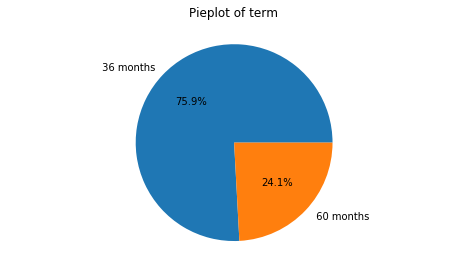

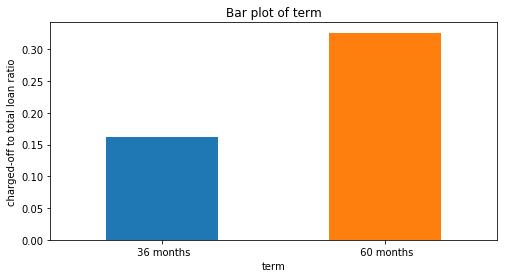

In [ ]:
# Run tow_plots on term
two_plots('term')

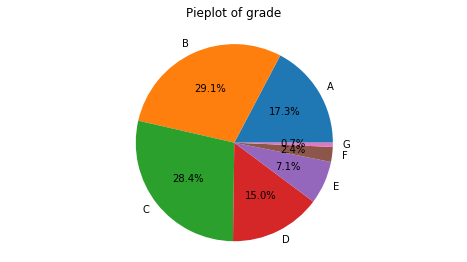

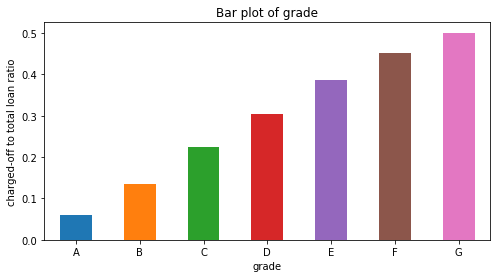

In [ ]:
# Run two_plots on grade
two_plots('grade')

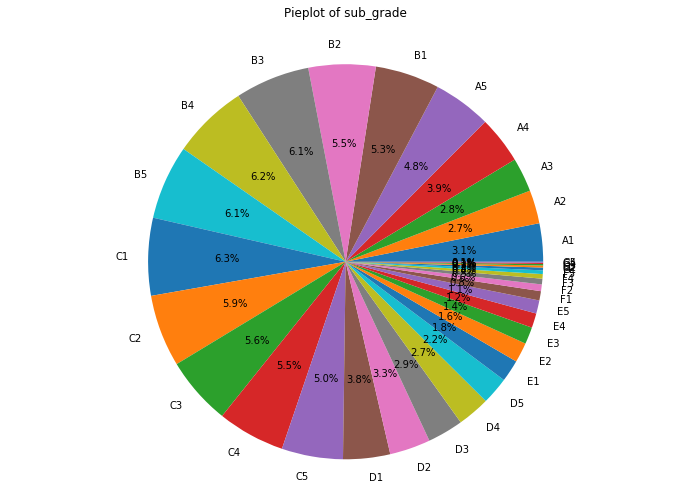

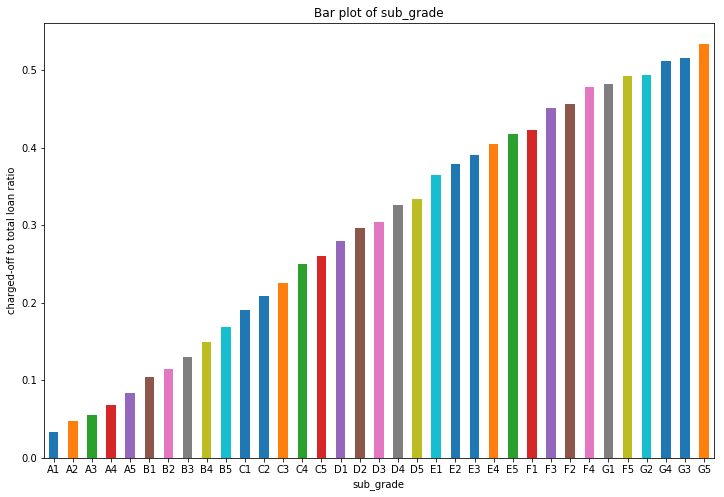

In [ ]:
# Run two plots on sub_grade
two_plots('sub_grade',figure_size=(12,8))

#### The bar plot of sub grade shows the impact of sub-grades on charge-off-to-total-loan ratio across the grades are quite similar. Therefore, sub_grade could be removed from features

In [ ]:
# Remove sub-grades from df
del df['sub_grade']

In [ ]:
# Print value counts of emp_title
df.emp_title.value_counts().head(20)

Teacher               19782
Manager               18096
Owner                  9370
Registered Nurse       8197
RN                     7996
Supervisor             7769
Sales                  6967
Driver                 6952
Project Manager        5996
Office Manager         5177
General Manager        4848
Director               4723
manager                4251
owner                  4237
Engineer               4009
President              3833
teacher                3832
driver                 3321
Vice President         3303
Operations Manager     3254
Name: emp_title, dtype: int64

In [ ]:
# It can be seen some titles are only different in upper or lower case such as driver and Driver; this issue is fixed
df['emp_title'] = df.emp_title.str.title()

# P.S. There is another problem with the employment title; some titles are redundant or very close to each other, for example, 
# registered nurse and RN are the same. This also could be improved, but due to its complexity, the step is skipped. 

In [ ]:
df.emp_title.nunique()

315574

#### There are two many unique values for employment title. Therefore, it is a high cardinality problem. The problem will be addressed later.

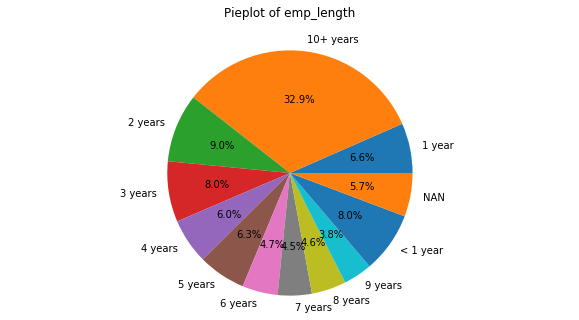

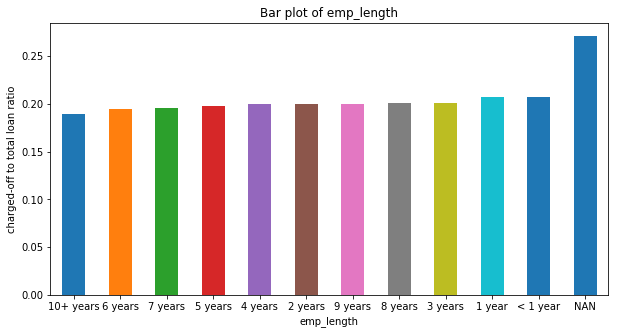

In [ ]:
# emp_length has null values. Replace them with NaN
df.emp_length.replace(np.NAN,'NAN',inplace=True)

# Run two_plots on emp_length
two_plots('emp_length',figure_size=(10,5))

#### Charged-off-to-total-loan ratio does not significantly change across different employment lengths. Also, the samples with no employment-length value have significantly higher Charged-off-to-total-loan ratio than the samples with specified employment-length. It does not make sense to define NAN as a separate category because all possible employment lengths are covered in other categories. Therefore, it is safer to drop the feature.

In [ ]:
# Drop emp_length
df.drop('emp_length',axis=1,inplace=True)

In [ ]:
#Run value_counts on home ownership
df.home_ownership.value_counts()

MORTGAGE    627679
RENT        503075
OWN         135425
ANY            247
OTHER          144
NONE            48
Name: home_ownership, dtype: int64

In [ ]:
# Replace NONE and ANY labels with OTHER to simplify the feature 
df.home_ownership.replace(['ANY','NONE'],'OTHER',inplace=True)

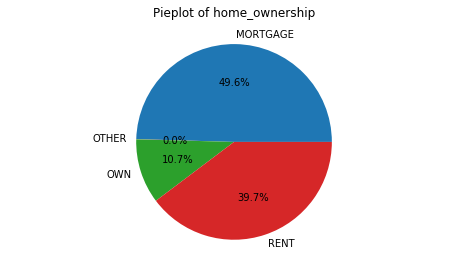

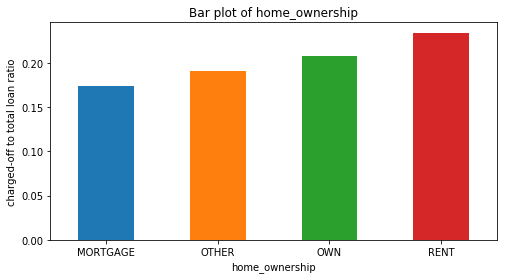

In [ ]:
# Run tow_plots on home_ownership
two_plots('home_ownership')

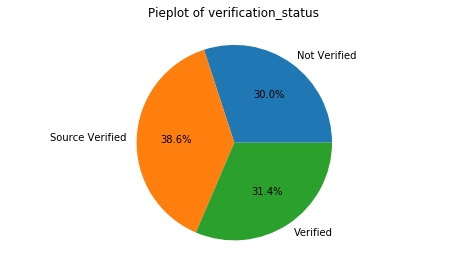

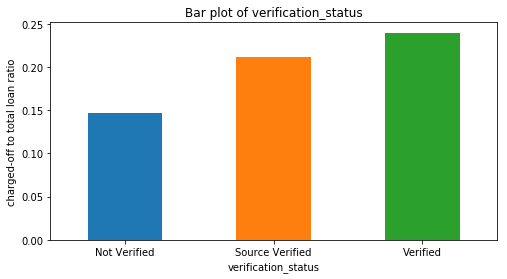

In [ ]:
#Run two_plots on verification_status
two_plots('verification_status')

In [ ]:
# Print the first three elements of isse_d
df.issue_d.head(3)

0    Dec-2016
1    Dec-2016
2    Dec-2016
Name: issue_d, dtype: object

In [ ]:
# Transform issue date to datetime format 
df.issue_d = pd.to_datetime(df.issue_d,format='%b-%Y')

In [ ]:
# Save the month of issue date in a new column
df['issue_month'] = df.issue_d.apply(lambda x:x.month).astype('str')

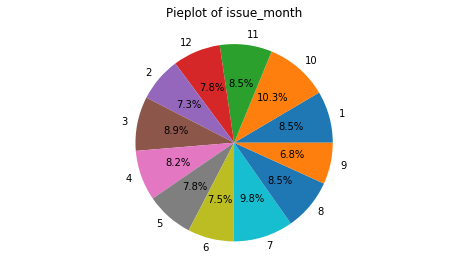

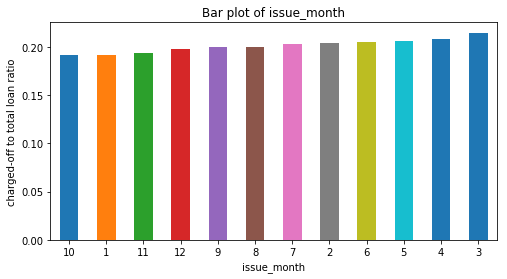

In [ ]:
# Run two_plots on issue_month 
two_plots('issue_month')

#### No significant difference in charged-off-to-total-loan ratio between months. So issue_month could be removed

In [ ]:
# Remove issue_month
df.drop('issue_month',axis=1,inplace=True)

In [ ]:
# Run value counts on payment plan
df.pymnt_plan.value_counts()

n    1266618
Name: pymnt_plan, dtype: int64

In [ ]:
# Remove payment plan because it has only one value
df.drop('pymnt_plan',axis=1,inplace=True)

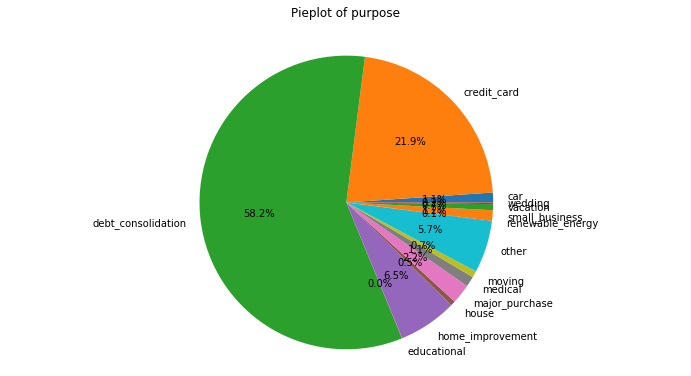

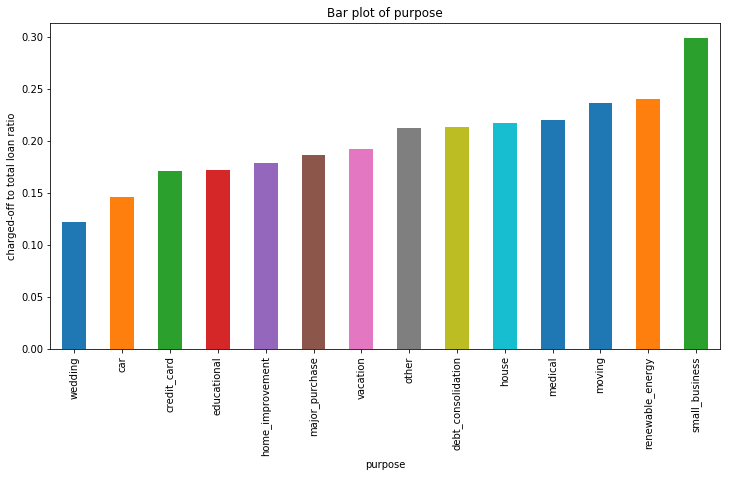

In [ ]:
#Run two_plots on purpose
two_plots('purpose',figure_size=(12,6),label_rotation='vertical')

In [ ]:
# Run value_counts on title
df.title.value_counts().head(20)

Debt consolidation           619241
Credit card refinancing      232590
Home improvement              69631
Other                         61279
Major purchase                22077
Debt Consolidation            15687
Medical expenses              12518
Business                      10978
Car financing                 10350
Vacation                       7459
Moving and relocation          7407
Consolidation                  5350
Home buying                    5340
debt consolidation             4808
Debt Consolidation Loan        3777
Credit Card Consolidation      2346
consolidation                  2163
Personal Loan                  2086
Consolidation Loan             1770
Home Improvement               1757
Name: title, dtype: int64

#### Elements of title are similar to elements of purpose. Therefore, purpose is enough and title is removed.

In [ ]:
# Remove title from features
del df['title']

In [ ]:
# value_count zip codes
df.zip_code.value_counts().head()

945xx    14262
750xx    13677
112xx    13053
606xx    11720
300xx    11381
Name: zip_code, dtype: int64

In [ ]:
df.zip_code.nunique()

942

#### Zip code also has high cardinality problem and will be addressed later.

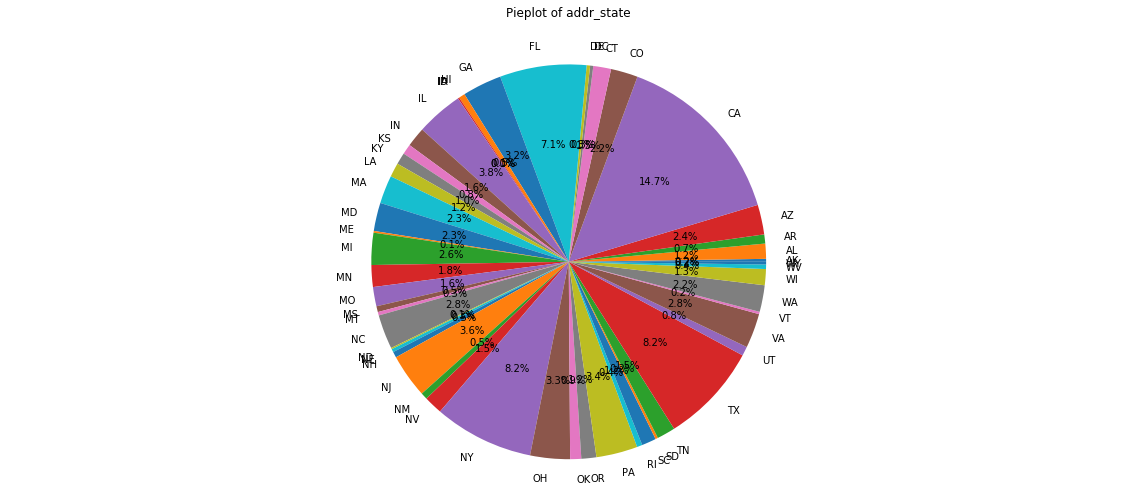

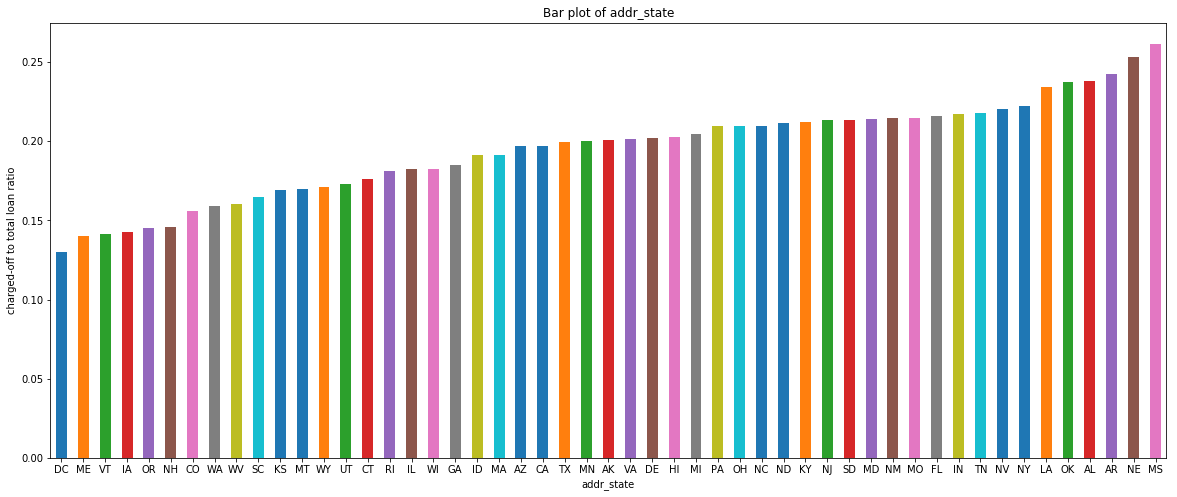

In [ ]:
# Run two plots on address state
two_plots('addr_state',figure_size=(20,8))

In [ ]:
# Transform earliest credit line to datetime format
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line,format='%b-%Y')

In [ ]:
# Store number of years since the earliest credit line in a new column
df['years_earliest_cr_line'] = df.issue_d - df.earliest_cr_line
df['years_earliest_cr_line'] = df.years_earliest_cr_line.apply(lambda x:np.round(x.days/365,2))

In [ ]:
# Drop earliest_cr_line
df.drop(['earliest_cr_line'],axis=1,inplace=True)

# Remove issue_d from df since it's no longer of use
df.drop('issue_d',axis=1,inplace=True)

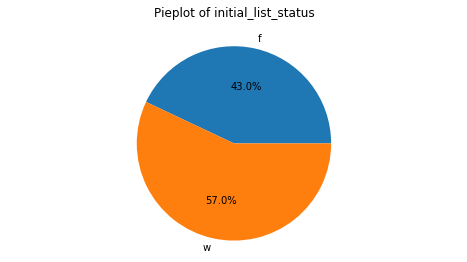

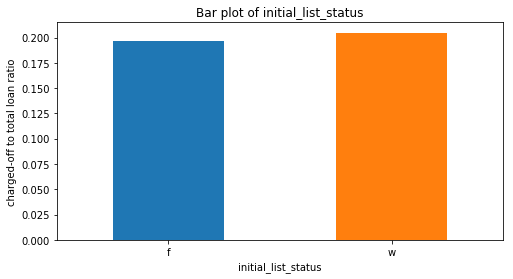

In [ ]:
# Run two_plots on initial_list_status
two_plots('initial_list_status')

#### initial_list_status could be removed because it does not significantly impact loan status

In [ ]:
# Remove initial_list_status 
df.drop('initial_list_status',axis=1,inplace=True)

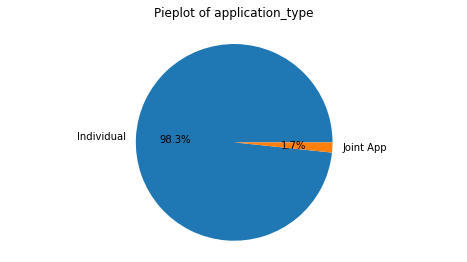

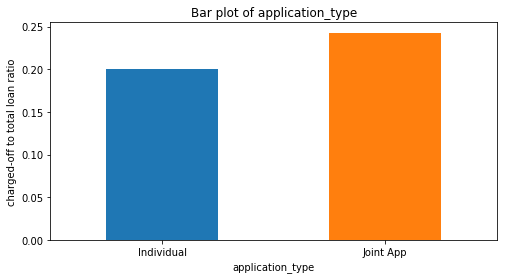

In [ ]:
# Run two_plots on application_type
two_plots('application_type')

#### Although a small percentage of loans have joint applicants, they have a higher chance of becoming charged off.

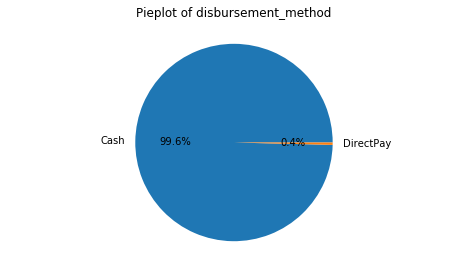

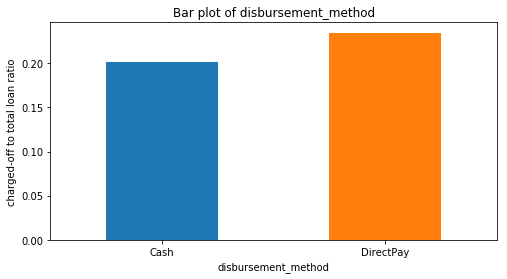

In [ ]:
# Run disbursement_method on application_type
two_plots('disbursement_method')

#### In order to address the high cardinality problem of ‘emp_title’ and 'zip_code', they are converted to numerical features. The assigned value to each level of a categorical feature is the ratio of charged-off ratio for the level to the charged-off ratio across all samples. In order to reduce the impact of levels with small number of samples, value 0 is assigned to levels with number of samples less than 5.

In [ ]:
# Define woe function which transforms emp_title and zip_code features to numerical features 

def cat_to_num(dataframe=df):
    """In order to fix the cardinality problem, this function is introduced to transform  emp_title and zip_code to numerical
    features. The function assigns a number to each level of the two features. The function will return 0 
    for the levels with less than 5 samples"""
    
    df_copy = dataframe.copy()
    charged_off = (dataframe.charged_off == 1).sum()
    total = len(dataframe.charged_off)
    for feature in ['emp_title','zip_code']:
        df_pivot= dataframe.pivot_table(index = feature, columns='charged_off',values='loan_amnt',aggfunc='count')
        # pivot_table returns NaN instead of 0.
        df_pivot.fillna(0,inplace=True)
        df_pivot['charged_off_ratio'] = df_pivot.apply(lambda x: (x[1]/(x[0]+x[1]))/(charged_off/total) if x[1]+x[0]>=5 else 0,axis=1)
        print('Highest charged-off ratio of ',feature,'\n',df_pivot.loc[:,'charged_off_ratio'].sort_values(ascending=False).head(20))
        list1 = df_pivot.index.tolist()
        list2 = df_pivot.charged_off_ratio.tolist()
        dictionary_map = dict(zip(list1,list2))
        df_copy[feature] = df_copy[feature].map(dictionary_map)
    return df_copy

In [ ]:
# Run cat_to_num on emp_title and zip_code 
df1= cat_to_num(df)

Highest charged-off ratio of  emp_title 
 emp_title
Universal Protection Services               4.971477
Frac Operator                               4.971477
Rig Mechanic                                4.971477
Executive Assistant To The President/Ceo    4.971477
Traffic Control Supervisor                  4.971477
Gs 14                                       4.971477
Collector 2                                 4.971477
Medicaid Coordinator                        4.971477
Central Transport                           4.350042
Mechanical Technician                       4.261266
Sprayer                                     4.142898
Service Tech 3                              4.142898
Kennel Tech                                 4.142898
Manager/Mechanic                            4.142898
Qa Lab Tech                                 4.142898
Derrickman                                  4.142898
Brake Operator                              4.142898
Qmed                                        4.1

In [ ]:
# Check if object features have any missing values
df.loc[:,df.dtypes[df.dtypes=='object'].index].isnull().any()

term                   False
grade                  False
home_ownership         False
verification_status    False
purpose                False
addr_state             False
application_type       False
disbursement_method    False
dtype: bool

#### No categorical features have any missing values.

In [ ]:
# Print number of columns
len(df.columns)

69

In [ ]:
# Save the wrangled data to a csv file
df.to_csv('df_wrangled.csv',index=False)